In [333]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# 定义基本的配置参数

In [334]:
# 定义生成矩形图片的数量
num_rect = 3000
# 定义图片的大小
size = 10
# 定义最小物体的大小
min_obj_size = 1
# 定义最大物体的大小
max_obj_size = 5
# 定义图片中物体的数量
obj_nums = 1 # 暂定为1

# 测试生成随机矩形数据

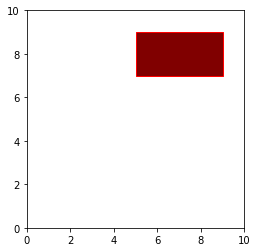

(9, 7, array([5]), array([9]), array([-4]), array([2]))

In [335]:
obj_width = np.random.randint(1,max_obj_size+1,size=1) # 生成随机的宽
obj_height = np.random.randint(1,max_obj_size+1,size=1) # 生成随机的高
obj_x = np.random.randint(0,size) #生成随机的x
obj_y = np.random.randint(0,size) #生成随机的y

obj_x2 = 0
obj_y2 = 0
# 进行判断,判断是放在左下角 \ 右下角 \左上角 \ 右上角 因为随机生成的矩形有可能会超出边界,这个时候需要进行判断
if obj_x + obj_width < size and obj_y + obj_height < size: # 右上角
  obj_x2 = obj_x + obj_width
  obj_y2 = obj_y + obj_height
elif obj_x + obj_width < size and obj_y - obj_height >= 0: # 右下角
  obj_x2 = obj_x + obj_width
  obj_y2 = obj_y - obj_height
  obj_height = 0 - obj_height
elif obj_x - obj_width >= 0 and obj_y + obj_height < size: # 左上角
  obj_x2 = obj_x - obj_width
  obj_y2 = obj_y + obj_height
  obj_width = 0 - obj_width
elif obj_x - obj_width >=0 and obj_y - obj_height >= 0: # 左下角
  obj_x2 = obj_x - obj_width
  obj_y2 = obj_y - obj_height
  obj_width = 0 - obj_width
  obj_height = 0 - obj_height
else:
  print("生成错误!!!")


# 尝试画出这个矩形
fig = plt.figure()
ax1 = fig.add_subplot(111, aspect='equal')
plt.xlim(0, size)
plt.ylim(0, size)
ax1.add_patch(matplotlib.patches.Rectangle((obj_x, obj_y), obj_width, obj_height, ec='r',color='maroon'))
plt.show()
obj_x,obj_y,obj_x2,obj_y2,obj_width,obj_height # 理论上这个应该是正确的图像

# 批量生成测试数据,然后划分训练集和验证集

In [336]:
datas = np.zeros((num_rect,size,size)) # 存放所有的图片信息
labels = np.zeros((num_rect,4)) # 存放所有的坐标信息
width_heights = np.zeros((num_rect,2))
for i in range(num_rect):
  obj_width = np.random.randint(1,max_obj_size+1,size=1) # 生成随机的宽
  obj_height = np.random.randint(1,max_obj_size+1,size=1) # 生成随机的高
  obj_x = np.random.randint(0,size) #生成随机的x
  obj_y = np.random.randint(0,size) #生成随机的y

  obj_x2 = 0
  obj_y2 = 0
  # 进行判断,判断是放在左下角 \ 右下角 \左上角 \ 右上角 因为随机生成的矩形有可能会超出边界,这个时候需要进行判断
  if obj_x + obj_width < size and obj_y + obj_height < size: # 右上角
    obj_x2 = obj_x + obj_width
    obj_y2 = obj_y + obj_height
  elif obj_x + obj_width < size and obj_y - obj_height >= 0: # 右下角
    obj_x2 = obj_x + obj_width
    obj_y2 = obj_y - obj_height
    obj_height = 0 - obj_height
  elif obj_x - obj_width >= 0 and obj_y + obj_height < size: # 左上角
    obj_x2 = obj_x - obj_width
    obj_y2 = obj_y + obj_height
    obj_width = 0 - obj_width
  elif obj_x - obj_width >=0 and obj_y - obj_height >= 0: # 左下角
    obj_x2 = obj_x - obj_width
    obj_y2 = obj_y - obj_height
    obj_width = 0 - obj_width
    obj_height = 0 - obj_height
  else:
    print("生成矩形错误!!!")
    break;
  labels[i] = [obj_x,obj_y,obj_x2[0],obj_y2[0]]
  width_heights[i] = [obj_width[0],obj_height[0]]
  temp_x = 0
  temp_x2 = 0
  temp_y =0 
  temp_y2 =0
  if obj_x < obj_x2[0]:
    temp_x = obj_x
    temp_x2 = obj_x2[0]
  else:
    temp_x = obj_x2[0]
    temp_x2 = obj_x
  if obj_y < obj_y2[0]:
    temp_y = obj_y
    temp_y2 = obj_y2[0]
  else:
    temp_y = obj_y2[0]
    temp_y2 = obj_y
  datas[i,temp_x:temp_x2,temp_y:temp_y2] = 1

In [337]:
datas[0],labels[0],width_heights[0]

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([3., 4., 7., 8.]),
 array([4., 4.]))

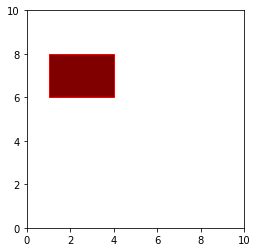

(1, 6, array([4]), array([8]), array([3]), array([2]))

In [338]:
# 尝试画出这个矩形
fig = plt.figure()
ax1 = fig.add_subplot(111, aspect='equal')
plt.xlim(0, size)
plt.ylim(0, size)
ax1.add_patch(matplotlib.patches.Rectangle((obj_x, obj_y), obj_width, obj_height, ec='r',color='maroon'))
plt.show()
obj_x,obj_y,obj_x2,obj_y2,obj_width,obj_height # 理论上这个应该是正确的图像

# 使用Dataloader对数据进行分割

In [339]:
# 通过dataLoader对数据进行分割
from torch.utils.data import DataLoader,Dataset 
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
from tqdm import tqdm

In [340]:
img_data = torch.from_numpy(datas).to(device)
img_data.shape

torch.Size([3000, 10, 10])

In [341]:
labels_data = torch.from_numpy(labels).to(device)
labels_data.shape

torch.Size([3000, 4])

In [342]:
# 定义DealDatasets返回相应的数据给Dataloader进行使用
class DealDatasets(Dataset):
  def __init__(self,img_data,labels_data):
    self.img_data = img_data
    self.labels_data = labels_data
    self.len = img_data.shape[0]

  def __getitem__(self,index):
    return self.img_data[index],self.labels_data[index]

  def __len__(self):
    return self.len

In [343]:
train_loader = DataLoader(DealDatasets(img_data,labels_data),batch_size=32,shuffle=True)

In [344]:
for i,data in enumerate(tqdm(train_loader)):
  t_data,t_label = data
# train_loader可以使用了.

100%|██████████| 94/94 [00:00<00:00, 1599.60it/s]


# 定义模型

In [345]:
class RecogizeShapeRegressionModel(nn.Module):
  def __init__(self,input_width,input_height):
    super().__init__()
    self.model = nn.Sequential(
      nn.Linear(input_width*input_height,128),
      nn.ReLU(),
      nn.Dropout(0.2,inplace=True),
      nn.Linear(128,64),
      # nn.ReLU(),
      # nn.Dropout(0.2,inplace=True),
      # nn.Linear(64,32),
      # nn.ReLU(),
      # nn.Dropout(0.2,inplace=True),
      # nn.Linear(32,16),
      nn.ReLU(),
      nn.Dropout(0.5,inplace=True),
      nn.Linear(64,4)
    )
  
  def forward(self,x):
    return self.model(x)


In [346]:
shapeRegressionModel = RecogizeShapeRegressionModel(size,size).double().to(device)
shapeRegressionModel

RecogizeShapeRegressionModel(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=True)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=True)
    (6): Linear(in_features=64, out_features=4, bias=True)
  )
)

In [347]:
# 定义loss
loss_fn = torch.nn.L1Loss()
adam = torch.optim.Adam(shapeRegressionModel.parameters(),lr=0.0001)

# 开始训练模型

In [348]:
size

10

In [349]:
epoches = 100
for epoch in tqdm(range(epoches)):
  for i,data in enumerate(train_loader):
    t_data,t_label = data
    # print(t_data.shape,t_label.shape)
    # print(t_label.shape)
    adam.zero_grad()
    predicted = shapeRegressionModel(t_data.view(-1,size*size))
    # print(predicted.shape)
    loss = loss_fn(predicted,t_label)
    loss.backward()
    adam.step()
    if i % 1000 == 0:
      print(epoch,i,loss.item())

  0%|          | 0/100 [00:00<?, ?it/s]

0 0 5.19578343141234


  1%|          | 1/100 [00:00<00:24,  4.05it/s]

1 0 4.530701330277931


  2%|▏         | 2/100 [00:00<00:23,  4.08it/s]

2 0 4.293141334664826


  4%|▍         | 4/100 [00:00<00:21,  4.36it/s]

3 0 2.856648248971638
4 0 2.736819506345771


  5%|▌         | 5/100 [00:01<00:22,  4.28it/s]

5 0 2.7516615626812095


  7%|▋         | 7/100 [00:01<00:20,  4.56it/s]

6 0 2.414259602040138
7 0 2.3581425313643947


  9%|▉         | 9/100 [00:01<00:18,  4.85it/s]

8 0 2.2044935594710307
9 0 2.228524263127079


 11%|█         | 11/100 [00:02<00:17,  4.98it/s]

10 0 1.987568296652709
11 0 2.111794347369699


 12%|█▏        | 12/100 [00:02<00:17,  5.06it/s]

12 0 2.0803030338393174


 13%|█▎        | 13/100 [00:02<00:17,  4.86it/s]

13 0 1.8206398944633264


 14%|█▍        | 14/100 [00:03<00:18,  4.55it/s]

14 0 1.8980207016719237


 15%|█▌        | 15/100 [00:03<00:19,  4.39it/s]

15 0 1.7736802736916455


 16%|█▌        | 16/100 [00:03<00:19,  4.30it/s]

16 0 1.8869903586951149


 18%|█▊        | 18/100 [00:03<00:17,  4.63it/s]

17 0 1.8951665255726426
18 0 1.8850238299160402


 20%|██        | 20/100 [00:04<00:15,  5.07it/s]

19 0 2.0817196388401658
20 0 1.7071647969730808


 22%|██▏       | 22/100 [00:04<00:15,  5.14it/s]

21 0 1.8737310467920398


 23%|██▎       | 23/100 [00:04<00:15,  5.05it/s]

22 0 1.8210891773186721


 24%|██▍       | 24/100 [00:05<00:14,  5.19it/s]

23 0 1.6824234525495183
24 0 1.705330261113829


 26%|██▌       | 26/100 [00:05<00:13,  5.41it/s]

25 0 1.895551696102682
26 0 1.8630824517147648


 28%|██▊       | 28/100 [00:05<00:13,  5.34it/s]

27 0 1.6639086112536818
28 0 1.6035285502251608


 30%|███       | 30/100 [00:06<00:12,  5.43it/s]

29 0 1.7795592123088815
30 0 1.850431231346507


 32%|███▏      | 32/100 [00:06<00:12,  5.49it/s]

31 0 1.6794729852607824
32 0 1.5496996851519844


 34%|███▍      | 34/100 [00:06<00:12,  5.25it/s]

33 0 1.5813041312669807
34 0 1.6828104232376506


 36%|███▌      | 36/100 [00:07<00:11,  5.48it/s]

35 0 1.7015318405829865
36 0 1.4912869371254498


 38%|███▊      | 38/100 [00:07<00:11,  5.31it/s]

37 0 1.6299086145908892
38 0 1.7933510340281715


 39%|███▉      | 39/100 [00:07<00:12,  4.86it/s]

39 0 1.563158658286266


 40%|████      | 40/100 [00:08<00:12,  4.64it/s]

40 0 1.5997227126538753


 41%|████      | 41/100 [00:08<00:13,  4.52it/s]

41 0 1.6919961048208436


 42%|████▏     | 42/100 [00:08<00:13,  4.42it/s]

42 0 1.3194888277917942


 43%|████▎     | 43/100 [00:08<00:13,  4.35it/s]

43 0 1.523933912449258


 44%|████▍     | 44/100 [00:09<00:13,  4.27it/s]

44 0 1.4908512664232552


 45%|████▌     | 45/100 [00:09<00:12,  4.27it/s]

45 0 1.6099937479417585


 46%|████▌     | 46/100 [00:09<00:12,  4.25it/s]

46 0 1.4073067103111216


 47%|████▋     | 47/100 [00:09<00:12,  4.25it/s]

47 0 1.4282695708523279


 48%|████▊     | 48/100 [00:10<00:12,  4.16it/s]

48 0 1.655223210721592


 49%|████▉     | 49/100 [00:10<00:12,  4.16it/s]

49 0 1.7979862326639027


 50%|█████     | 50/100 [00:10<00:11,  4.19it/s]

50 0 1.6471118657693624


 51%|█████     | 51/100 [00:10<00:11,  4.10it/s]

51 0 1.4317682243625125


 52%|█████▏    | 52/100 [00:10<00:11,  4.25it/s]

52 0 1.5528723313156219


 53%|█████▎    | 53/100 [00:11<00:11,  4.24it/s]

53 0 1.440024632426699


 54%|█████▍    | 54/100 [00:11<00:10,  4.24it/s]

54 0 1.6575350329524337


 55%|█████▌    | 55/100 [00:11<00:10,  4.27it/s]

55 0 1.4700873535023828


 56%|█████▌    | 56/100 [00:11<00:09,  4.40it/s]

56 0 1.4959792240862702


 58%|█████▊    | 58/100 [00:12<00:08,  4.76it/s]

57 0 1.462344498020748
58 0 1.4183121106636718


 60%|██████    | 60/100 [00:12<00:07,  5.14it/s]

59 0 1.5027955263041564
60 0 1.6143766830759492


 62%|██████▏   | 62/100 [00:13<00:07,  5.23it/s]

61 0 1.4515392350335525
62 0 1.4992689926338636


 64%|██████▍   | 64/100 [00:13<00:06,  5.42it/s]

63 0 1.334474567804816
64 0 1.4994822651944995


 66%|██████▌   | 66/100 [00:13<00:06,  5.48it/s]

65 0 1.4451673759360335
66 0 1.5124318884022372


 68%|██████▊   | 68/100 [00:14<00:05,  5.37it/s]

67 0 1.3940718290737288
68 0 1.5386967079263643


 69%|██████▉   | 69/100 [00:14<00:05,  5.28it/s]

69 0 1.5171055180290307


 70%|███████   | 70/100 [00:14<00:06,  4.93it/s]

70 0 1.6592709484746389


 72%|███████▏  | 72/100 [00:14<00:05,  4.89it/s]

71 0 1.4680655255308226
72 0 1.56361275225668


 74%|███████▍  | 74/100 [00:15<00:04,  5.23it/s]

73 0 1.4496396259077124
74 0 1.447201206587021


 76%|███████▌  | 76/100 [00:15<00:04,  5.14it/s]

75 0 1.6075514224812733
76 0 1.5813599349454623


 77%|███████▋  | 77/100 [00:15<00:04,  4.92it/s]

77 0 1.4071082771567487


 78%|███████▊  | 78/100 [00:16<00:04,  4.69it/s]

78 0 1.4291137044935724


 79%|███████▉  | 79/100 [00:16<00:04,  4.49it/s]

79 0 1.3370304477624018


 80%|████████  | 80/100 [00:16<00:04,  4.39it/s]

80 0 1.546339642777566


 81%|████████  | 81/100 [00:16<00:04,  4.31it/s]

81 0 1.391362597758448


 82%|████████▏ | 82/100 [00:17<00:04,  4.23it/s]

82 0 1.4437045247551676


 83%|████████▎ | 83/100 [00:17<00:04,  4.23it/s]

83 0 1.485078863907113


 84%|████████▍ | 84/100 [00:17<00:03,  4.19it/s]

84 0 1.5819095437454327


 86%|████████▌ | 86/100 [00:18<00:03,  4.62it/s]

85 0 1.4040819206606354
86 0 1.5300404747543022


 88%|████████▊ | 88/100 [00:18<00:02,  5.07it/s]

87 0 1.4000435935570845
88 0 1.4402547781957422


 90%|█████████ | 90/100 [00:18<00:01,  5.23it/s]

89 0 1.4734443395406238
90 0 1.4954147967759481


 92%|█████████▏| 92/100 [00:19<00:01,  5.06it/s]

91 0 1.692710510462236


 93%|█████████▎| 93/100 [00:19<00:01,  5.20it/s]

92 0 1.504649825533777
93 0 1.3908023057031313


 95%|█████████▌| 95/100 [00:19<00:00,  5.18it/s]

94 0 1.4578794903233026
95 0 1.5388446694092477


 96%|█████████▌| 96/100 [00:19<00:00,  5.07it/s]

96 0 1.5413895928301016


 97%|█████████▋| 97/100 [00:20<00:00,  4.68it/s]

97 0 1.5037708685493736


 98%|█████████▊| 98/100 [00:20<00:00,  4.49it/s]

98 0 1.4453803878599238


 99%|█████████▉| 99/100 [00:20<00:00,  4.34it/s]

99 0 1.4475986462114097


100%|██████████| 100/100 [00:20<00:00,  4.78it/s]


# 单独测试模型的效果

随机生成一个图像,然后让模型来判断

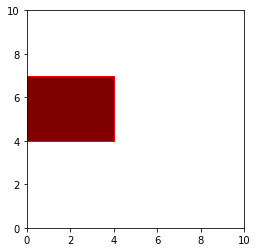

(0.0, 7.0, 4.0, 4.0, 4.0, -3.0)

In [352]:
test_datas = np.zeros((1,size,size)) # 存放所有的图片信息
test_labels = np.zeros((1,4)) # 存放所有的坐标信息
test_width_heights = np.zeros((1,2))
for i in range(1):
  obj_width = np.random.randint(1,max_obj_size+1,size=1) # 生成随机的宽
  obj_height = np.random.randint(1,max_obj_size+1,size=1) # 生成随机的高
  obj_x = np.random.randint(0,size) #生成随机的x
  obj_y = np.random.randint(0,size) #生成随机的y

  obj_x2 = 0
  obj_y2 = 0
  # 进行判断,判断是放在左下角 \ 右下角 \左上角 \ 右上角 因为随机生成的矩形有可能会超出边界,这个时候需要进行判断
  if obj_x + obj_width < size and obj_y + obj_height < size: # 右上角
    obj_x2 = obj_x + obj_width
    obj_y2 = obj_y + obj_height
  elif obj_x + obj_width < size and obj_y - obj_height >= 0: # 右下角
    obj_x2 = obj_x + obj_width
    obj_y2 = obj_y - obj_height
    obj_height = 0 - obj_height
  elif obj_x - obj_width >= 0 and obj_y + obj_height < size: # 左上角
    obj_x2 = obj_x - obj_width
    obj_y2 = obj_y + obj_height
    obj_width = 0 - obj_width
  elif obj_x - obj_width >=0 and obj_y - obj_height >= 0: # 左下角
    obj_x2 = obj_x - obj_width
    obj_y2 = obj_y - obj_height
    obj_width = 0 - obj_width
    obj_height = 0 - obj_height
  else:
    print("生成矩形错误!!!")
    break;
  test_labels[i] = [obj_x,obj_y,obj_x2[0],obj_y2[0]]
  test_width_heights[i] = [obj_width[0],obj_height[0]]
  temp_x = 0
  temp_x2 = 0
  temp_y =0 
  temp_y2 =0
  if obj_x < obj_x2[0]:
    temp_x = obj_x
    temp_x2 = obj_x2[0]
  else:
    temp_x = obj_x2[0]
    temp_x2 = obj_x
  if obj_y < obj_y2[0]:
    temp_y = obj_y
    temp_y2 = obj_y2[0]
  else:
    temp_y = obj_y2[0]
    temp_y2 = obj_y
  test_datas[i,temp_x:temp_x2,temp_y:temp_y2] = 1

# 尝试画出这个矩形
fig = plt.figure()
ax1 = fig.add_subplot(111, aspect='equal')
plt.xlim(0, size)
plt.ylim(0, size)
ax1.add_patch(matplotlib.patches.Rectangle((test_labels[0][0], test_labels[0][1]), test_width_heights[0][0], test_width_heights[0][1], ec='r',color='maroon'))
plt.show()
test_labels[0][0],test_labels[0][1],test_labels[0][2],test_labels[0][3],test_width_heights[0][0],test_width_heights[0][1] # 理论上这个应该是正确的图像

tensor([[0.5688, 4.5409, 2.9365, 5.3704]], device='cuda:0',
       dtype=torch.float64, grad_fn=<AddmmBackward>)


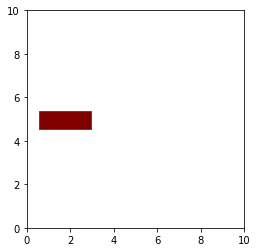

In [353]:
test_input = torch.from_numpy(test_datas).to(device).view(-1,size*size)
result = shapeRegressionModel(test_input)
print(result)
# 尝试画出预测的矩形
fig = plt.figure()
ax1 = fig.add_subplot(111, aspect='equal')
plt.xlim(0, size)
plt.ylim(0, size)
test_width=0
test_hight=0
# if result[0][0] > result[0][2]:
#   test_width = result[0][2] - result[0][0]
# else:
#   test_width = result[0][0] - result[0][2]
ax1.add_patch(matplotlib.patches.Rectangle((result[0][0], result[0][1]), result[0][2] - result[0][0], result[0][3] - result[0][1], ec='r',color='maroon'))
plt.show()
# test_labels[0][0],test_labels[0][1],test_labels[0][2],test_labels[0][3],test_width_heights[0][0],test_width_heights[0][1] # 理论上这个应该是正确的图像